In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

In [52]:
df_train = pd.read_excel(r'C:\Users\lenovo\Downloads\DS_Practice\MACHINEHACK HACKATHONS\Book-Price-MachineHack\Data\Data_Train.xlsx')

In [53]:
df_test = pd.read_excel(r'C:\Users\lenovo\Downloads\DS_Practice\MACHINEHACK HACKATHONS\Book-Price-MachineHack\Data\Data_Test.xlsx')

In [54]:
df_train.head(3)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00


In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 243.7+ KB


In [56]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1560 non-null   object
 1   Author        1560 non-null   object
 2   Edition       1560 non-null   object
 3   Reviews       1560 non-null   object
 4   Ratings       1560 non-null   object
 5   Synopsis      1560 non-null   object
 6   Genre         1560 non-null   object
 7   BookCategory  1560 non-null   object
dtypes: object(8)
memory usage: 48.8+ KB


## Data Exploration

### Analyse Price of book column.

Let's proceed and check the distribution of the target variable.

In [ ]:
#SalePrice
sns.distplot(df_train['Price'])

In [8]:
#skewness
print("The skewness of SalePrice is {}".format(df_train['Price'].skew()))

Let's log transform this variable and see if this variable distribution can get any closer to normal.

In [9]:
#now transforming the target variable
target = np.log(df_train['Price'])
print('Skewness is', target.skew())
sns.distplot(target)

### Analyse Genre column in train data set.

In [10]:
df_train.Genre.value_counts(normalize=True)*100

In [11]:
sns.countplot(x='Genre', data=df_train)
plt.xticks(rotation='vertical')
plt.show()

Too many categories in genre column so it is irrelevant to add Genre column in predictive model.  

### Analyse BookCategory column in train data set.

In [12]:
df_train.BookCategory.value_counts(normalize=True)*100

In [13]:
sns.countplot(x='BookCategory', data=df_train)
plt.xticks(rotation='vertical')
plt.show()

In [14]:
## Box and whiskers plot is very useful to find relationship between numerical & categorical variables

sns.boxplot(x='BookCategory', y = 'Price', data=df_train)
plt.xticks(rotation = 'vertical')
plt.show()

In [15]:
## Cricket movie :- Fire In Babylon

In [16]:
## Title column is not necessary to add in prediction model.
df_train.Title.value_counts()

In [17]:
df_train.Author.value_counts(normalize=True)*100

## Data Pre Processing 

In [18]:
#Creating a copy of the train and test datasets
test_copy  = df_test.copy()
train_copy  = df_train.copy()

In [19]:
##Concat Train and Test datasets
train_copy['train']  = 1
test_copy['train']  = 0
df = pd.concat([train_copy, test_copy], axis=0,sort=False)

In [20]:
## Remove title column from data set because it is not necessary in model development.
df.drop(columns ='Title', axis=1, inplace =True)

In [21]:
df.drop(columns=['Synopsis', 'Author','Genre'], axis=1, inplace=True)

## Feature Engineering

In [22]:
## Extract reviews in numeric form 
df['Reviews(out_of_5)'] = df['Reviews'].str[:3]
## Make column numeric
df['Reviews(out_of_5)'] = pd.to_numeric(df["Reviews(out_of_5)"]) 
## drop reviews column
df.drop(['Reviews'],axis=1, inplace=True)

In [23]:
df['Edition_date'] = df['Edition'].str[-11:]

In [24]:
df['Edition_date'].head(5)

In [25]:
## Extract ratings in numeric form 
df['Ratings_count'] = df['Ratings'].str[:2]

In [26]:
import re

df['Ratings_count'] = df['Ratings'].str.replace(r'[^\d.]+', '')

In [27]:
## Make column data type numeric
df['Ratings_count'] = pd.to_numeric(df['Ratings_count'])

## Drop Ratings column
df.drop(['Ratings'], axis=1, inplace=True)

## Drop Edition column in dataframe.
df.drop(['Edition'], axis=1, inplace=True)

In [28]:
df.head()

In [29]:
##df_author = df_train.Author.value_counts().loc[lambda x: x>15].reset_index()['index']

## And if you don't need to have the result within a series, just do this:
## df2.mi.value_counts().loc[lambda x: x>5].index

In [30]:
df["Year"] = df["Edition_date"].str[-4:]
#df["Year"] = df["Year"].astype('int32')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce') 

## Drop irrelevant values in year column other than year 
df.dropna(subset=['Year'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7767 entries, 0 to 1559
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BookCategory       7767 non-null   object 
 1   Price              6216 non-null   float64
 2   train              7767 non-null   int64  
 3   Reviews(out_of_5)  7767 non-null   float64
 4   Edition_date       7767 non-null   object 
 5   Ratings_count      7767 non-null   int64  
 6   Year               7767 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 424.8+ KB


Their is no need to add month column because there is almost equall number of books releasing on each month.

### Graph a Correlation heatmap between numeric variables.

In [33]:
numeric_data = df.select_dtypes(exclude = [object])
numeric_data.drop('train', inplace=True, axis=1)
numeric_data.shape

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(7767, 4)

In [34]:
corr_matrix = numeric_data.corr()
corr_matrix

,Price,Reviews(out_of_5),Ratings_count,Year
Price,1.000000,0.107784,-0.077556,-0.024814
Reviews(out_of_5),0.107784,1.000000,-0.000946,0.007712
Ratings_count,-0.077556,-0.000946,1.000000,0.024005
Year,-0.024814,0.007712,0.024005,1.000000


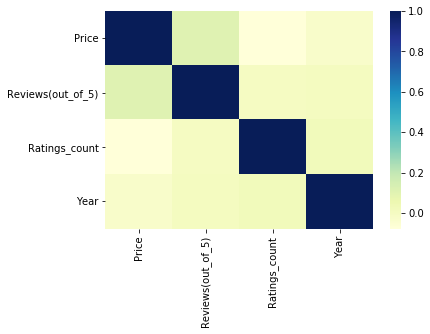

In [36]:
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()

### Compare price and edition year of books

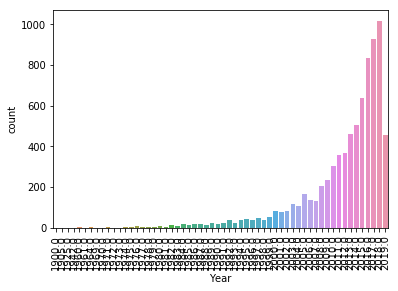

In [38]:
sns.countplot(x='Year', data=df)
plt.xticks(rotation='vertical')
plt.show()

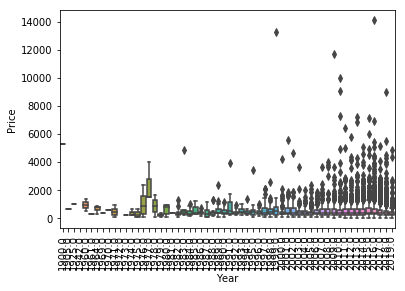

In [39]:
## Box and whiskers plot is very useful to find relationship between numerical & categorical variables

sns.boxplot(x='Year', y = 'Price', data=df)
plt.xticks(rotation = 'vertical')
plt.show()

In [41]:
## Detect and remove outliers
df['Price'].max()

14100.0

In [44]:
df['Price'].mean()

560.1986454311453

In [49]:
df[df['Price']>9000]

,BookCategory,Price,train,Reviews(out_of_5),Edition_date,Ratings_count,Year
886,Politics,13244.67,1,4.0,27 Oct 1999,1,1999.0
2455,Comics & Mangas,14100.00,1,4.9,26 Aug 2016,22,2016.0
2560,"Arts, Film & Photography",9096.00,1,4.5,28 May 2010,10,2010.0
2607,"Arts, Film & Photography",11715.12,1,4.0,6 Oct 2009,1,2009.0
2818,Romance,9984.00,1,5.0,2 Mar 2010,1,2010.0


In [50]:
## Drop outliners in price column 

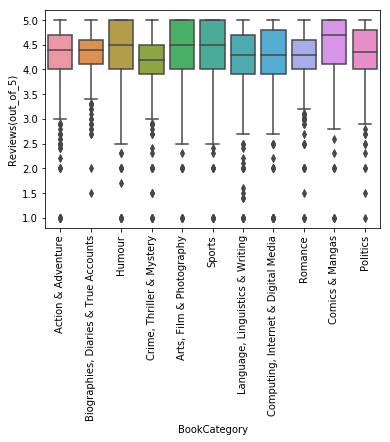

In [57]:
## Box and whiskers plot is very useful to find relationship between numerical & categorical variables

sns.boxplot(x='BookCategory', y = 'Reviews(out_of_5)', data=df)
plt.xticks(rotation = 'vertical')
plt.show()